# CAD Laboratory (CE4P001) - Assignment No. 2


**Name:** Amiya Das  <br>
**Roll No.:** 22CE01057 <br>

<h3>Question-1</h3>

Given the two-dimensional body <br>

<div style="margin-left: 40px">

$ B = {\{(X_1,X_2) \quad | \,\, 0.1 < X_1 < 1, \,\, 0.1 < X_2 < 1\}}, $

and the displacement field <br>

&nbsp; $ u_1 = u \cdot e_1 = 0.2 \, ln (1 + X1 + X2), $

&nbsp; $ u_2 = u \cdot e_2 = 0.2 \, e^{X_1} $

Plot the displaced shape of the body using Julia.<br>

</div>

**Hint:** First set up some characteristic lines on the body. For each point compute its displacement and
add it to the original position by noting $ x_i = e_i \cdot (X + u) $

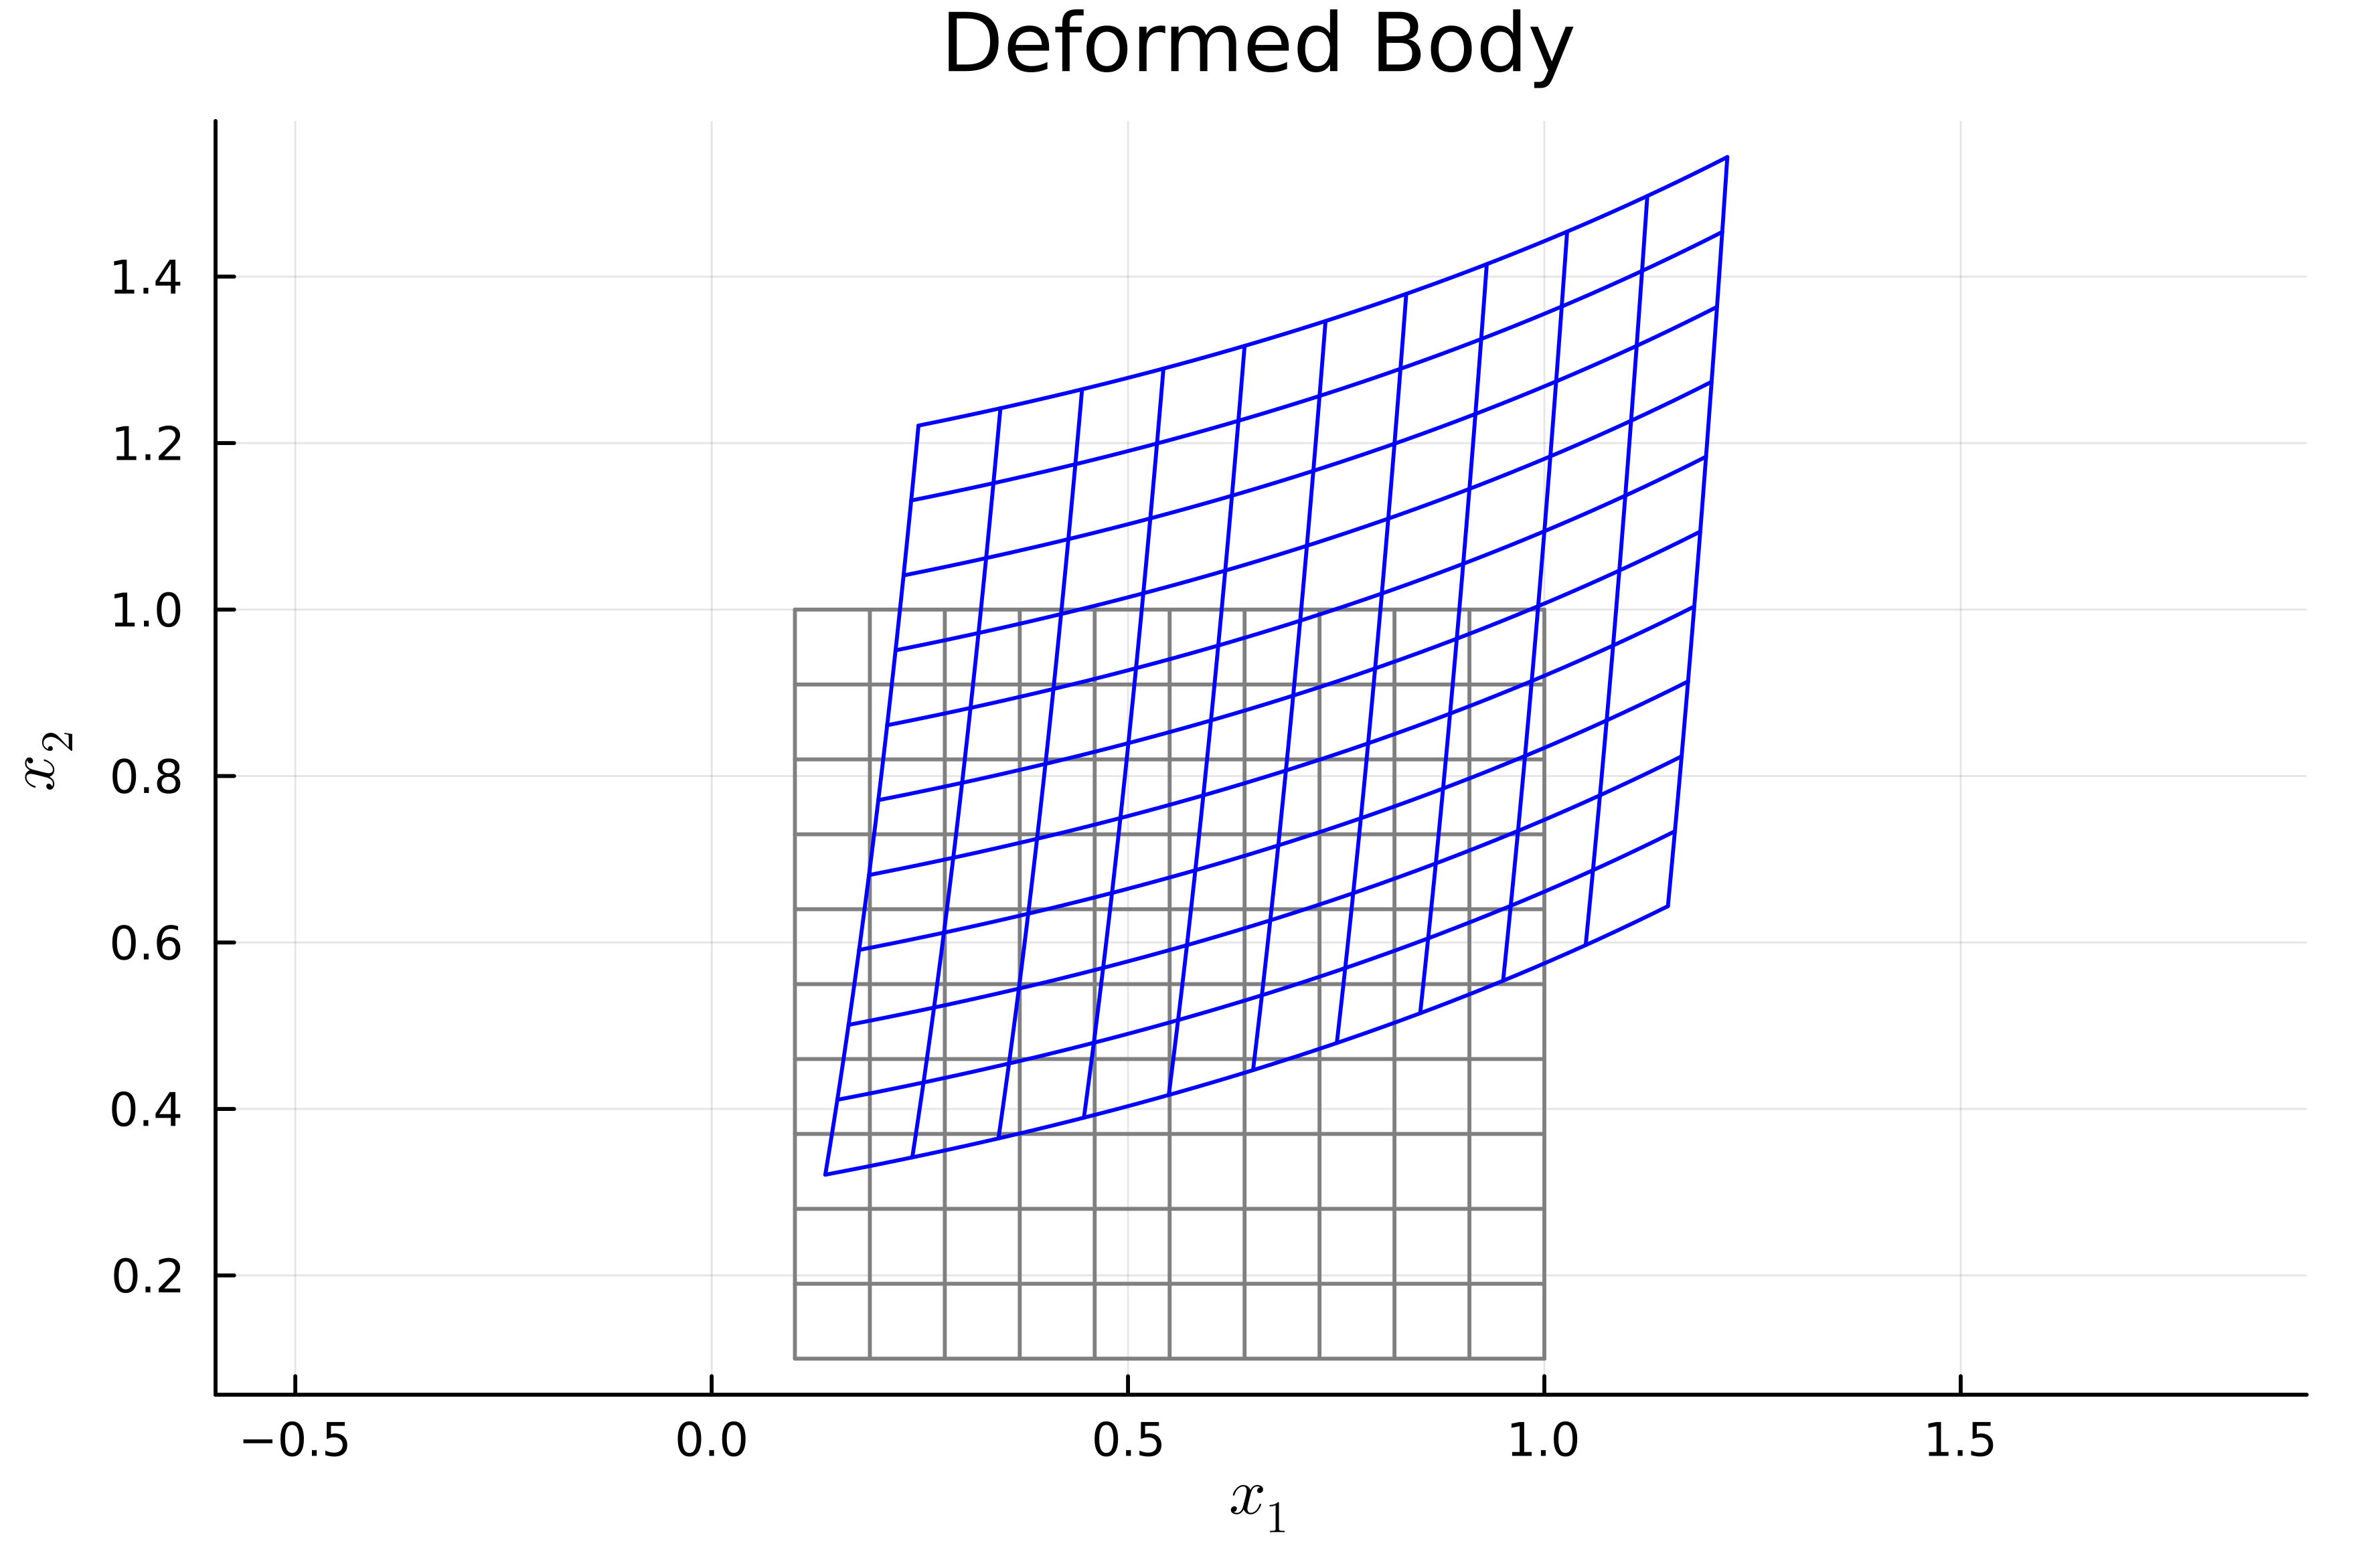

In [1]:
using Plots
using LaTeXStrings

# Plots.GRBackend()
gr()

# Displacement field
u1(X1, X2) = 0.2 * log(1.0 + X1 + X2)
u2(X1, X2) = 0.2 * exp(X1)

# Domain
x1_min, x1_max = 0.1, 1.0
x2_min, x2_max = 0.1, 1.0

# Create characteristic lines
n_lines = 11
X1_lines = range(x1_min, x1_max, length=n_lines)
X2_lines = range(x2_min, x2_max, length=n_lines)
n_points = 50
X1_range = range(x1_min, x1_max, length=n_points)
X2_range = range(x2_min, x2_max, length=n_points)

p1 = plot(title="Deformed Body", xlabel=L"x_1", ylabel=L"x_2", aspect_ratio=:equal, legend=false)

for X1 in X1_lines
    plot!(p1, fill(X1, n_points), X2_range, color=:gray)
end

for X2 in X2_lines
    plot!(p1, X1_range, fill(X2, n_points), color=:gray)
end

for X1 in X1_lines
    # Vertical lines
    x1_deformed = X1 .+ u1.(X1, X2_range)
    x2_deformed = X2_range .+ u2.(X1, X2_range)
    plot!(p1, x1_deformed, x2_deformed, color=:blue)
end

for X2 in X2_lines
    # Horizontal lines
    x1_deformed = X1_range .+ u1.(X1_range, X2)
    x2_deformed = X2 .+ u2.(X1_range, X2)
    plot!(p1, x1_deformed, x2_deformed, color=:blue)
end

savefig("Deformation_1.png")
display(p1) 

<h3>Question</h3>

(a) The following transformation is assigned:

<div style="margin-left: 40px">

$x_1' = x_1 + \alpha x_2, $

$x_2' = x_2, $

$x_3' = x_3,$

</div>

where $x_i$ and $x_i'$ ($i = 1,2,3$), respectively, denote the reference and deformed
configurations. Consider $\alpha = 0.5$ and write a Julia code to:

<div style="margin-left: 40px">

i) Study the deformation of a unit cube defined by the coordinates of the corner points: $ \qquad (0,0,0),\ (1,0,0),\ (1,1,0),\ (0,1,0),\ (0,0,1),\ (1,0,1),\ (1,1,1),\ (0,1,1)$.

ii) Calculate the components of the tensor.

iii) $\mathbf{C} = \mathbf{F}^T \mathbf{F}.$

</div>



Deformation gradient F = 
[1.0 0.5 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]

Right Cauchy–Green tensor C = FᵀF = 
[1.0 0.5 0.0; 0.5 1.25 0.0; 0.0 0.0 1.0]

Reference vertices (columns):
[0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0; 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0; 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0]

Deformed vertices (columns):
[0.0 1.0 1.5 0.5 0.0 1.0 1.5 0.5; 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0; 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0]


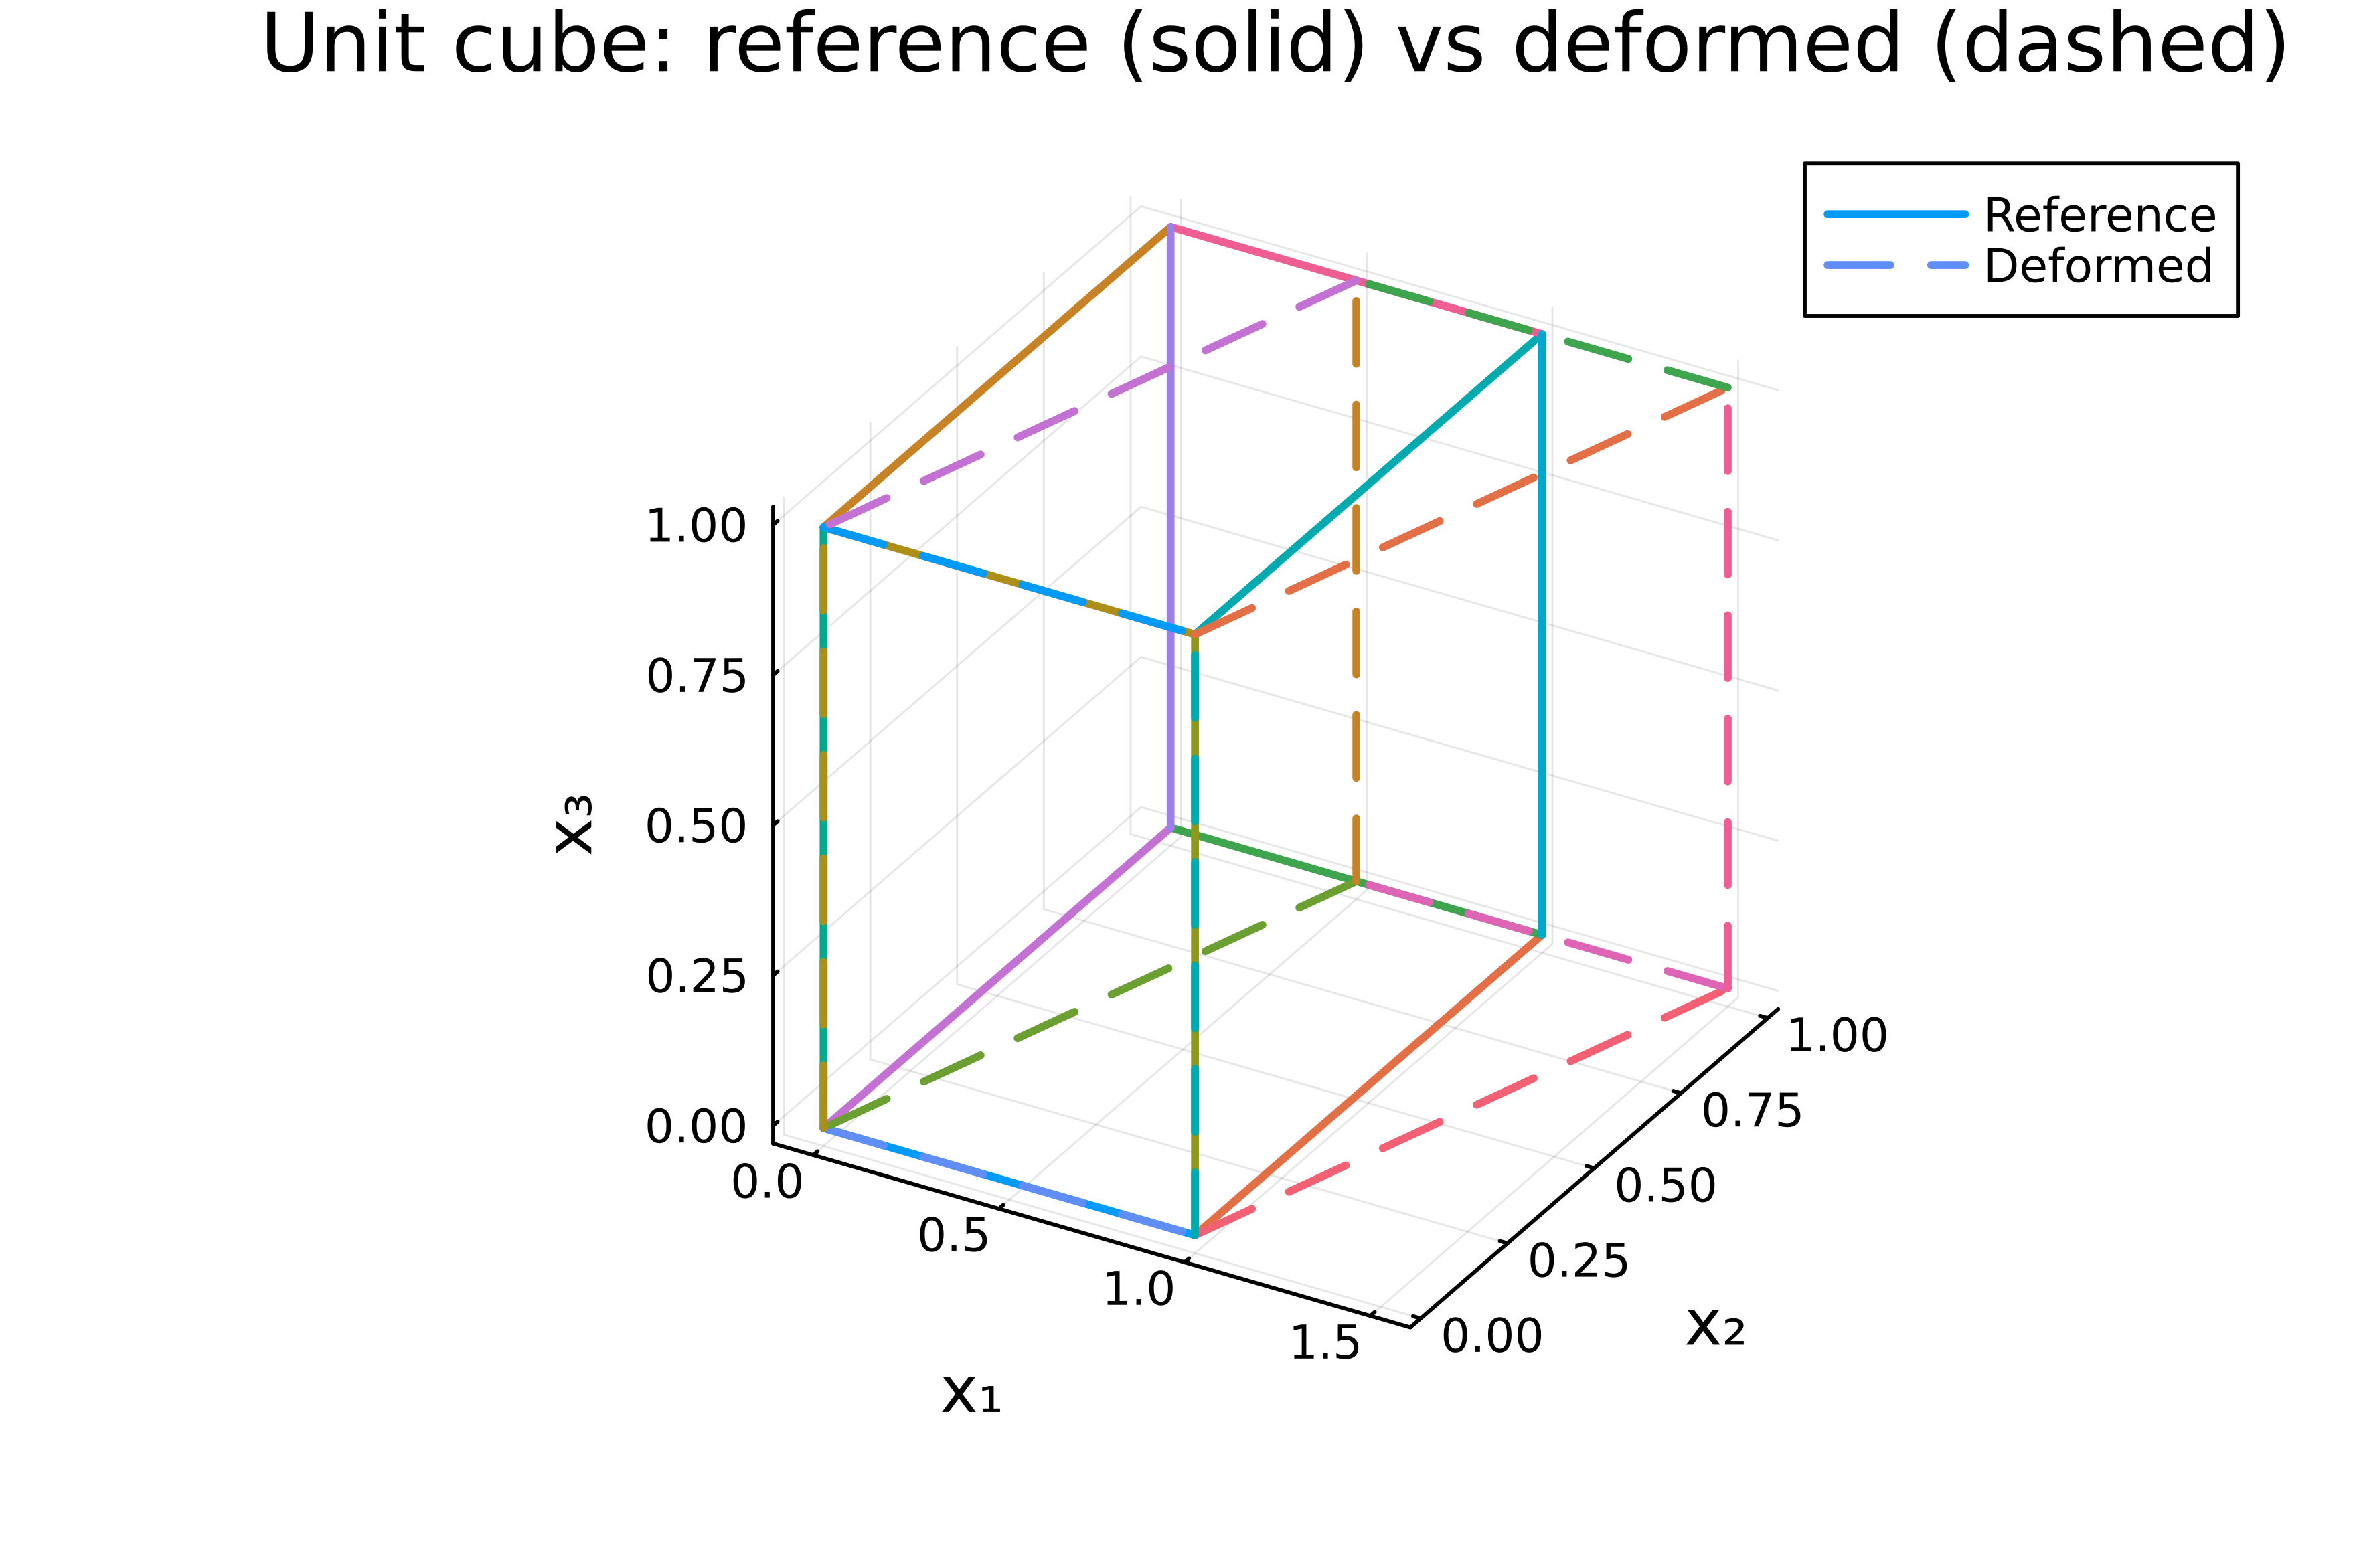

In [2]:
############################################################
# Q1(a)  Deformation of a unit cube and computation of C = F'F
############################################################

using LinearAlgebra           # for matrix operations
using Plots                   # for 3D plotting

# ------------------------------------------------------------------
# 1. Define the deformation mapping x' = F x
#    x1' = x1 + α x2,  x2' = x2,  x3' = x3
# ------------------------------------------------------------------

α = 0.5                      # given
F = [1.0  α   0.0;           # deformation gradient
     0.0  1.0 0.0;
     0.0  0.0 1.0]

println("Deformation gradient F = ")
println(F)

# Right Cauchy–Green tensor C = Fᵀ F
C = transpose(F) * F

println("\nRight Cauchy–Green tensor C = FᵀF = ")
println(C)

# ------------------------------------------------------------------
# 2. Unit cube vertices in the reference configuration
#    Each column is a vertex X = (X1, X2, X3)
# ------------------------------------------------------------------

X = hcat(
    [0.0, 0.0, 0.0],   # 1
    [1.0, 0.0, 0.0],   # 2
    [1.0, 1.0, 0.0],   # 3
    [0.0, 1.0, 0.0],   # 4
    [0.0, 0.0, 1.0],   # 5
    [1.0, 0.0, 1.0],   # 6
    [1.0, 1.0, 1.0],   # 7
    [0.0, 1.0, 1.0]    # 8
)

# Apply deformation: x = F * X
X_def = F * X

println("\nReference vertices (columns):")
println(X)
println("\nDeformed vertices (columns):")
println(X_def)

# ------------------------------------------------------------------
# 3. Plot reference and deformed cubes (wireframes)
# ------------------------------------------------------------------

# List of edges as pairs of vertex indices (1-based)
edges = [
    (1, 2), (2, 3), (3, 4), (4, 1),   # bottom face
    (5, 6), (6, 7), (7, 8), (8, 5),   # top face
    (1, 5), (2, 6), (3, 7), (4, 8)    # vertical edges
]

plt = plot(
    title = "Unit cube: reference (solid) vs deformed (dashed)",
    xlabel = "x₁",
    ylabel = "x₂",
    zlabel = "x₃",
    legend = :topright,
    aspect_ratio = :equal
)

# Plot reference configuration
first_edge = true
for (i, j) in edges
    xs = X[1, [i, j]]
    ys = X[2, [i, j]]
    zs = X[3, [i, j]]
    plot!(plt, xs, ys, zs,
          label = first_edge ? "Reference" : false,
          linewidth = 2)
    first_edge = false
end

# Plot deformed configuration
first_edge = true
for (i, j) in edges
    xs = X_def[1, [i, j]]
    ys = X_def[2, [i, j]]
    zs = X_def[3, [i, j]]
    plot!(plt, xs, ys, zs,
          linestyle = :dash,
          label = first_edge ? "Deformed" : false,
          linewidth = 2)
    first_edge = false
end

display(plt)


(b) Write a Julia code to draw the bending moment diagram (BMD) and the shear force diagram (SFD) for the beam shown in Fig.~1. Determine the slope at point $A$, the deflection at point $C$, and the deflection at point $D$ of the beam shown in Fig.~1. You may use any standard method taught in the structural analysis course.

![image.png](Field(b).png)